# **Pemantauan dan Prediksi Banjir Berbasis Curah Hujan di Kabupaten Cilacap**
#### Projek ini merupakan tugas akhir dari pelatihan TSA DTS Kominfo 2023 yang dibuat oleh kelompok 4. Dengan berfokus forecast pada data curah hujan dan prediksi kejadian banjir, diharapkan dapat memberikan kontribusi signifikan dalam upaya pencegahan dan mitigasi dampak banjir di Kabupaten Cilacap.


## Daftar Isi


Daftar isi untuk proyek ini adalah sebagai berikut:-

1. Pernyataan masalah
2. Mengimport libraries
3. Mengimport dataset
4. Exploratory data analysis
    -	4.1 Dataset Banjir Jawa Tengah   
    -	4.2 Dataset Curah Hujan Kabupaten Cilacap
    -	4.3 Dataset Gabungan
5. Data Pre-processing
6. Modelling
    -	6.1 Naive Bayes
    -	6.2 XGBoost
    -	6.3 Decision Tree
    -	6.4 Logistic Regression  
    -	6.5 CatBoost
    -	6.6 Neural Network
    -	6.7 Hyperparameter Optimization  
        -	6.7.1 Grid Search - Random Forest
        -	6.7.2 Grid Search - SVM
7. Evaluasi Model
8. Feature Importance
9. Prediksi

## 1. Pernyataan masalah <a class="anchor" id="1"></a>

Pada tahap sebelumnya, tim telah berhasil melakukan preprocessing pada data mentah. Kini, data yang telah diolah akan menjadi dasar dalam pembuatan model untuk melakukan prediksi apakah terjadi banjir atau tidak, berdasarkan nilai curah hujan di Kabupaten Cilacap. Projek ini bertujuan untuk mengembangkan model prediktif yang dapat memberikan informasi lebih lanjut tentang potensi terjadinya banjir berdasarkan kondisi curah hujan. Dengan demikian, tujuan utama dari pemodelan ini adalah meningkatkan pemahaman dan kemampuan dalam mengantisipasi dan mengurangi risiko banjir di wilayah tersebut.

## 2. Mengimport libraries <a class="anchor" id="2"></a>
Sebelum memulai tahap analisis, langkah awal yang kami lakukan adalah mengimpor berbagai libraries yang akan digunakan dalam projek ini.

In [ ]:
# %pip install catboost
# %pip install dtreeviz

  Using cached dtreeviz-2.2.2-py3-none-any.whl (91 kB)


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

import dtreeviz

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn import svm

import tensorflow as tf
from keras import Input, Model
from keras.layers import Dense

from sklearn.metrics import roc_curve, auc

import pickle

import warnings
warnings.filterwarnings('ignore')

## 3. Mengimport dataset <a class="anchor" id="3"></a>

Langkah berikutnya dalam analisis data ini adalah mengimpor dataset yang telah dipersiapkan sebelumnya. Dataset yang digunakan merupakan gabungan antara data kejadian banjir dari Badan Nasional Penanggulangan Bencana (BNPB) dan data curah hujan harian di Kabupaten Cilacap yang diperoleh dari World Weather Online. Rentang data yang digunakan adalah dari Januari 2020 hingga Februari 2023, dan satuan untuk curah hujan yang dicatat adalah dalam milimeter (mm).

Sumber data original kejadian banjir dari Badan Nasional Penanggulangan Bencana (BNPB) dapat diperoleh dari
[https://dibi.bnpb.go.id/](https://dibi.bnpb.go.id/).

Sumber data original curah hujan harian di Kabupaten Cilacap dari World Weather Online dapat diperoleh dari [https://www.worldweatheronline.com/](https://www.worldweatheronline.com/).

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Tugas DTS TSA/Dashboard Pemantauan dan Prediksi Banjir Kabupaten Cilacap/Dataset/cilacap_final_dataset.csv'

In [ ]:
# Data Historis Kejadian Banjir dan Curah Hujan di Jawa Tengah
df = pd.read_csv(file_path)
df

,date,Kejadian,Penyebab,Keterangan,Lokasi,Posisi,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
0,2020-01-01,Tidak Banjir,NaN,NaN,Cilacap,NaN,1.6,0.0,1.5,0.0,0.2,0.2,2.1,0.0,2.1,0.800000
1,2020-01-02,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.4,0.0,0.0,0.0,0.1,7.8,2.4,0.0,7.8,1.528571
2,2020-01-03,Banjir,NaN,"40 sumur tercemar, Ketinggian air mengenang se...",Cilacap,"-7.64872, 109.15607",0.0,0.0,0.0,0.2,0.1,8.1,1.3,0.0,8.1,1.385714
3,2020-01-04,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.2,1.1,0.0,0.0,0.0,0.7,1.3,0.0,1.3,0.471429
4,2020-01-05,Banjir,NaN,NaN,Cilacap,"-7.62933, 108.81783",0.2,0.5,0.0,0.0,1.1,3.0,0.0,0.0,3.0,0.685714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,2023-01-31,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.0,0.0,0.0,0.0,6.0,0.1,0.0,6.0,0.871429
1127,2023-02-01,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.0,0.0,0.0,0.1,5.7,2.4,0.0,5.7,1.171429
1128,2023-02-02,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.2,0.1,0.0,0.1,1.2,0.0,0.0,1.2,0.228571
1129,2023-02-03,Tidak Banjir,NaN,NaN,Cilacap,NaN,0.0,0.4,0.3,0.2,0.0,0.1,0.0,0.0,0.4,0.142857


## 4. Exploratory data analysis <a class="anchor" id="4"></a>

In [ ]:
df = df[['Kejadian','hujan_0',	'hujan_300',	'hujan_600', 'hujan_900', 'hujan_1200',	'hujan_1500',	'hujan_2100',	'min_hujan',	'max_hujan',	'avg_hujan']]
df

,Kejadian,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
0,Tidak Banjir,1.6,0.0,1.5,0.0,0.2,0.2,2.1,0.0,2.1,0.800000
1,Tidak Banjir,0.4,0.0,0.0,0.0,0.1,7.8,2.4,0.0,7.8,1.528571
2,Banjir,0.0,0.0,0.0,0.2,0.1,8.1,1.3,0.0,8.1,1.385714
3,Tidak Banjir,0.2,1.1,0.0,0.0,0.0,0.7,1.3,0.0,1.3,0.471429
4,Banjir,0.2,0.5,0.0,0.0,1.1,3.0,0.0,0.0,3.0,0.685714
...,...,...,...,...,...,...,...,...,...,...,...
1126,Tidak Banjir,0.0,0.0,0.0,0.0,0.0,6.0,0.1,0.0,6.0,0.871429
1127,Tidak Banjir,0.0,0.0,0.0,0.0,0.1,5.7,2.4,0.0,5.7,1.171429
1128,Tidak Banjir,0.0,0.2,0.1,0.0,0.1,1.2,0.0,0.0,1.2,0.228571
1129,Tidak Banjir,0.0,0.4,0.3,0.2,0.0,0.1,0.0,0.0,0.4,0.142857


Dalam persiapan untuk pembuatan model prediksi, kita telah melakukan pemilihan variabel pada dataset. Variabel yang terpilih untuk dimasukkan ke dalam model prediksi adalah sebagai berikut:

- Variabel Fitur (Feature Variable): Data Curah Hujan
  - Variabel curah hujan pada berbagai jam dalam sehari (hujan_0, hujan_300, hujan_600, hujan_900, hujan_1200, hujan_1500, hujan_2100, min_hujan, max_hujan, avg_hujan).
- Variabel Target (Target Variable): Kejadian (Banjir atau Tidak)
  - Variabel kejadian yang akan menjadi target prediksi dalam model.

In [ ]:
# Melihat informasi dasar tentang dataset
df.info()

# Melihat statistik deskriptif
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kejadian    1131 non-null   object 
 1   hujan_0     1131 non-null   float64
 2   hujan_300   1131 non-null   float64
 3   hujan_600   1131 non-null   float64
 4   hujan_900   1131 non-null   float64
 5   hujan_1200  1131 non-null   float64
 6   hujan_1500  1131 non-null   float64
 7   hujan_2100  1131 non-null   float64
 8   min_hujan   1131 non-null   float64
 9   max_hujan   1131 non-null   float64
 10  avg_hujan   1131 non-null   float64
dtypes: float64(10), object(1)
memory usage: 97.3+ KB


,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,0.219805,0.209195,0.144385,0.130858,0.465429,1.289478,0.527321,0.008665,1.904421,0.426639
std,0.661639,0.663328,0.466916,0.370043,1.152250,2.413913,0.925062,0.050965,2.516603,0.527767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.057143
50%,0.000000,0.000000,0.000000,0.000000,0.100000,0.200000,0.000000,0.000000,0.900000,0.214286
75%,0.100000,0.100000,0.050000,0.100000,0.300000,1.400000,0.600000,0.000000,2.600000,0.628571
max,10.000000,11.400000,8.400000,5.400000,9.700000,17.700000,6.000000,0.800000,17.700000,3.885714


In [ ]:
# Pengecekan nilai-nilai yang missing
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Kejadian      0
hujan_0       0
hujan_300     0
hujan_600     0
hujan_900     0
hujan_1200    0
hujan_1500    0
hujan_2100    0
min_hujan     0
max_hujan     0
avg_hujan     0
dtype: int64


In [ ]:
# Visualisasi distribusi kejadian banjir

# Create a DataFrame for countplot
count_df = df['Kejadian'].value_counts().reset_index()
count_df.columns = ['Kejadian', 'Count']

# Create a countplot using Plotly Express
fig = px.bar(count_df, x='Kejadian', y='Count', color='Kejadian',
             title='Distribusi Kejadian Banjir dan Tidak Banjir',
             labels={'Kejadian': 'Status', 'Count': 'Jumlah'},
             color_discrete_map={'Tidak Banjir': 'blue', 'Banjir': 'orange'})

fig.show()

In [ ]:
# Visualisasi matriks korelasi

# Create a DataFrame for correlation matrix
correlation_matrix = df[['hujan_0', 'hujan_300', 'hujan_600', 'hujan_900', 'hujan_1200', 'hujan_1500', 'hujan_2100', 'min_hujan', 'max_hujan', 'avg_hujan']].corr()

# Create heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix.values,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='plasma',
                    colorbar=dict(title='Korelasi'),
                ))

# Update layout with rotated x-axis labels
fig.update_layout(title='Matriks Korelasi Curah Hujan',
                  width=800, height=600,
                  xaxis=dict(tickangle=-45, tickmode='array'))

fig.show()

In [ ]:
# Visualisasi Data Outlier

fig = go.Figure()

for column in df[['hujan_0', 'hujan_300', 'hujan_600', 'hujan_900', 'hujan_1200', 'hujan_1500', 'hujan_2100', 'min_hujan', 'max_hujan', 'avg_hujan']]:
    fig.add_trace(go.Box(y=df[column], name=column))

fig.update_layout(
    title='Distribusi Curah Hujan untuk Setiap Jam',
    xaxis=dict(tickangle=45),
    yaxis=dict(title='Curah Hujan (mm)'),
    width=1000, height=600,
    showlegend=False
)

fig.show()


## 5. Data Pre-processing <a class="anchor" id="5"></a>

In [ ]:
# Mengganti nilai 'Tidak Banjir' menjadi 0 dan 'Banjir' menjadi 1
df['Kejadian'] = df['Kejadian'].map({'Tidak Banjir': 0, 'Banjir': 1})
df

,Kejadian,hujan_0,hujan_300,hujan_600,hujan_900,hujan_1200,hujan_1500,hujan_2100,min_hujan,max_hujan,avg_hujan
0,0,1.6,0.0,1.5,0.0,0.2,0.2,2.1,0.0,2.1,0.800000
1,0,0.4,0.0,0.0,0.0,0.1,7.8,2.4,0.0,7.8,1.528571
2,1,0.0,0.0,0.0,0.2,0.1,8.1,1.3,0.0,8.1,1.385714
3,0,0.2,1.1,0.0,0.0,0.0,0.7,1.3,0.0,1.3,0.471429
4,1,0.2,0.5,0.0,0.0,1.1,3.0,0.0,0.0,3.0,0.685714
...,...,...,...,...,...,...,...,...,...,...,...
1126,0,0.0,0.0,0.0,0.0,0.0,6.0,0.1,0.0,6.0,0.871429
1127,0,0.0,0.0,0.0,0.0,0.1,5.7,2.4,0.0,5.7,1.171429
1128,0,0.0,0.2,0.1,0.0,0.1,1.2,0.0,0.0,1.2,0.228571
1129,0,0.0,0.4,0.3,0.2,0.0,0.1,0.0,0.0,0.4,0.142857


In [ ]:
# Pisahkan kolom target dan fitur
X = df.drop('Kejadian', axis=1)  # Atribut/fitur
y = df['Kejadian']  # Target

y.value_counts()

0    1069
1      62
Name: Kejadian, dtype: int64

In [ ]:
# Melakukan resampling data untuk mengatasi ketimpangan data

#SMOTE
oversample = SMOTE()
Xsmt, Ysmt = oversample.fit_resample(X, y)
counter = Counter (Ysmt)
print(counter)

Counter({0: 1069, 1: 1069})


## 6. Modelling <a class="anchor" id="6"></a>

In [ ]:
# Split data training dan data testing
train_X, test_X, train_y, test_y = train_test_split(Xsmt, Ysmt, test_size = 0.20 ,random_state = 123)

# Menyimpan hasil evaluasi model
resultsDict={}

In [ ]:
# Mengecek shape train_X, test_X, train_y, dan test_y
print("train_X (baris, kolom): ", train_X.shape)
print("test_X (baris, kolom): ", test_X.shape)
print("train_y (baris, kolom): ", train_y.shape)
print("test_y (baris, kolom): ", test_y.shape)

train_X (baris, kolom):  (1710, 10)
test_X (baris, kolom):  (428, 10)
train_y (baris, kolom):  (1710,)
test_y (baris, kolom):  (428,)


In [ ]:
# Create the confussion matrix
def make_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    categories = ['No','Yes']

    sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):

    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# Menampilkan nilai evaluasi dari model
def evaluate_model(model_name, test_y, y_pred):

    mae = mean_absolute_error(test_y, y_pred)
    rmse = mean_squared_error(test_y, y_pred, squared=False)
    r2 = r2_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred)
    recall = recall_score(test_y, y_pred)
    accuracy = accuracy_score(test_y, y_pred)
    f1 = f1_score(test_y, y_pred)
    roc_auc = roc_auc_score(test_y, y_pred)

    evaluation_data = {
        'Model': [model_name],
        'MAE': [mae],
        'RMSE': [rmse],
        'R2': [r2],
        'Precision': [precision],
        'Recall': [recall],
        'Accuracy': [accuracy],
        'F1 Score': [f1],
        'ROC-AUC': [roc_auc]
    }

    evaluation_df = pd.DataFrame(evaluation_data)

    return evaluation_df

### Naive Bayes <a class="anchor" id="6.1"></a>

In [ ]:
nb = MultinomialNB()
nb.fit(train_X, train_y)
# get predictions from best model above
y_pred = nb.predict(test_X)

print("Analysis Model Naive Bayes")
print("")
print("Analysis Metric Eror Model Training")

target_names = ['Tidak_Banjir','Banjir']
print(classification_report(test_y, y_pred, target_names=target_names))

print('confusion_matrix : ')
print(confusion_matrix(test_y, y_pred))

print("accuracy_score : ", accuracy_score(test_y, y_pred))
print("f1_score : ", f1_score(test_y, y_pred))

resultsDict['Naive Bayes'] = evaluate_model("Naive Bayes", test_y, y_pred)

Analysis Model Naive Bayes

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

Tidak_Banjir       0.53      0.65      0.58       209
      Banjir       0.57      0.44      0.49       219

    accuracy                           0.54       428
   macro avg       0.55      0.54      0.54       428
weighted avg       0.55      0.54      0.54       428

confusion_matrix : 
[[136  73]
 [123  96]]
accuracy_score :  0.5420560747663551
f1_score :  0.49484536082474223


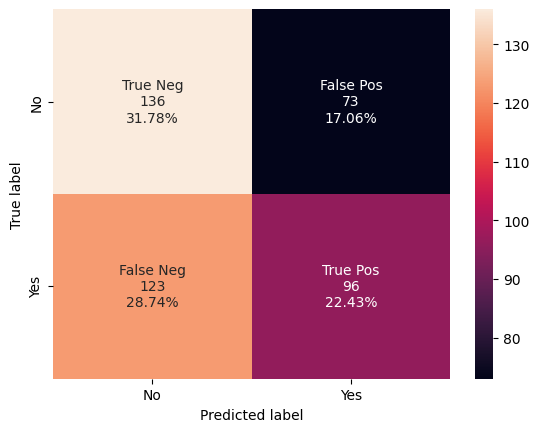

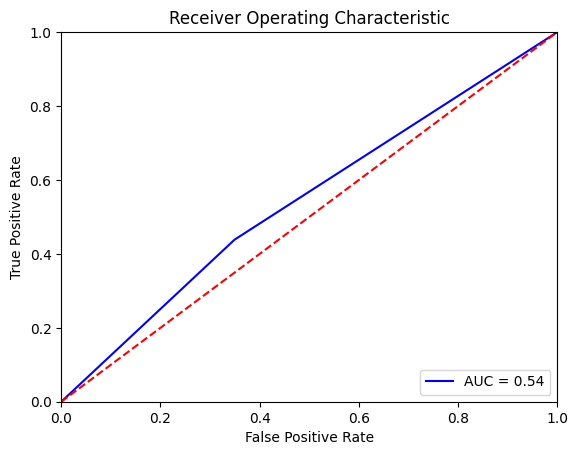

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)

### XGBoost <a class="anchor" id="6.2"></a>

In [ ]:
xgb = XGBClassifier(n_estimators=100, max_depth = 10)
xgb.fit(train_X, train_y)
y_pred = xgb.predict(test_X)

print("Analysis Model XGBoost")
print("")
print("Analysis Metric Eror Model Training")

target_names = ['Tidak_Banjir','Banjir']
print(classification_report(test_y, y_pred, target_names=target_names))

print('confusion_matrix : ')
print(confusion_matrix(test_y, y_pred))

print("accuracy_score : ", accuracy_score(test_y, y_pred))
print("f1_score : ", f1_score(test_y, y_pred))

resultsDict['XGBoost'] = evaluate_model("XGBoost", test_y, y_pred)

Analysis Model XGBoost

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

Tidak_Banjir       0.95      0.98      0.97       209
      Banjir       0.98      0.95      0.97       219

    accuracy                           0.97       428
   macro avg       0.97      0.97      0.97       428
weighted avg       0.97      0.97      0.97       428

confusion_matrix : 
[[205   4]
 [ 10 209]]
accuracy_score :  0.9672897196261683
f1_score :  0.9675925925925927


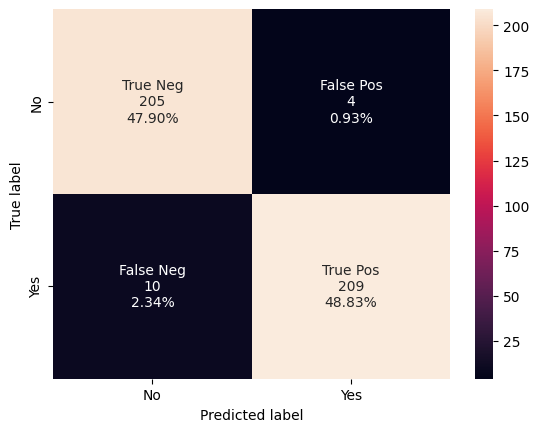

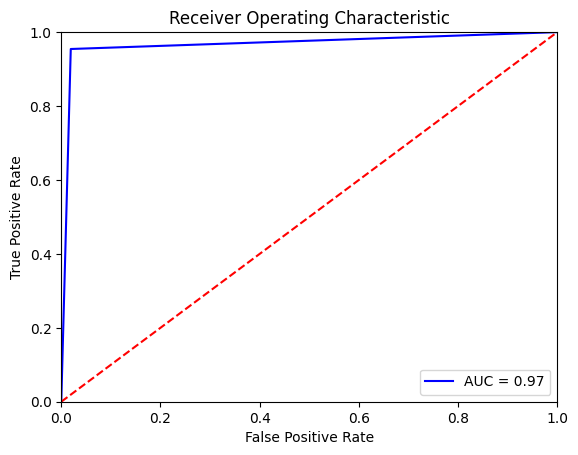

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)

### Decision Tree <a class="anchor" id="6.3"></a>

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(train_X, train_y)

#Predict the response for test dataset
y_pred = clf.predict(test_X)

print("Analysis Model Decision Tree")
print("")
print("Analysis Metric Eror Model Training")

target_names = ['Tidak_Banjir','Banjir']
print(classification_report(test_y, y_pred, target_names=target_names))

print('confusion_matrix : ')
print(confusion_matrix(test_y, y_pred))

print("accuracy_score : ", accuracy_score(test_y, y_pred))
print("f1_score : ", f1_score(test_y, y_pred))

resultsDict['Decision Tree'] = evaluate_model("Decision Tree", test_y, y_pred)

Analysis Model Decision Tree

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

Tidak_Banjir       0.94      0.95      0.94       209
      Banjir       0.95      0.94      0.94       219

    accuracy                           0.94       428
   macro avg       0.94      0.94      0.94       428
weighted avg       0.94      0.94      0.94       428

confusion_matrix : 
[[198  11]
 [ 13 206]]
accuracy_score :  0.9439252336448598
f1_score :  0.9449541284403669


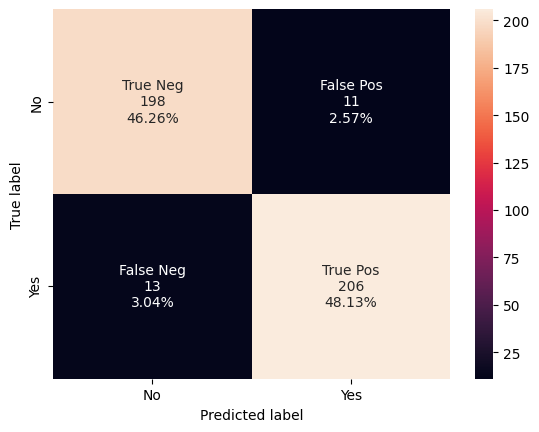

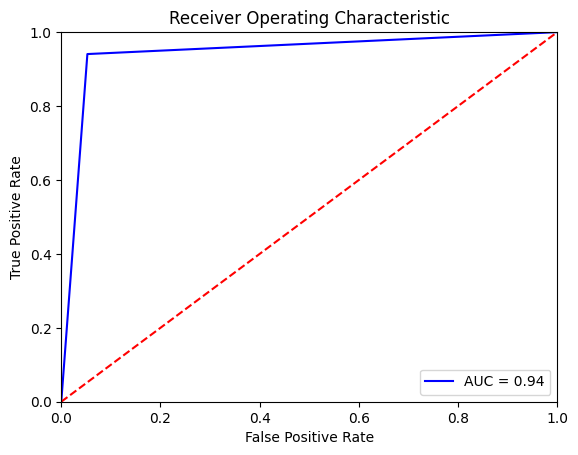

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)

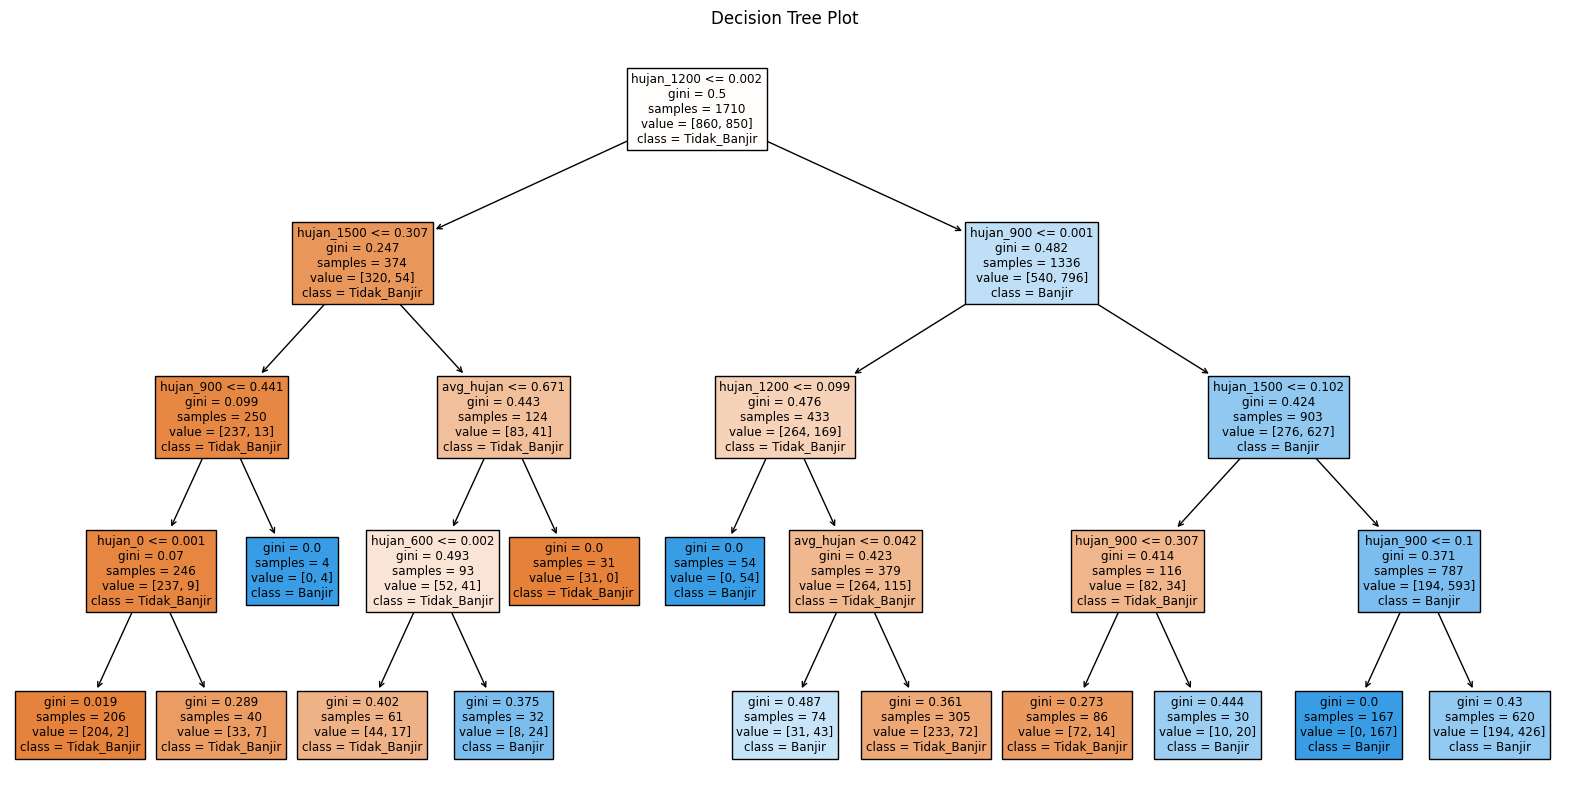

In [ ]:
# Membuat objek Decision Tree Classifier dengan batasan kedalaman maksimum
clf = DecisionTreeClassifier(max_depth=4)

# Melatih Decision Tree Classifier
clf = clf.fit(train_X, train_y)

# Plot pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=train_X.columns, class_names=target_names)
plt.title("Decision Tree Plot")
plt.show()

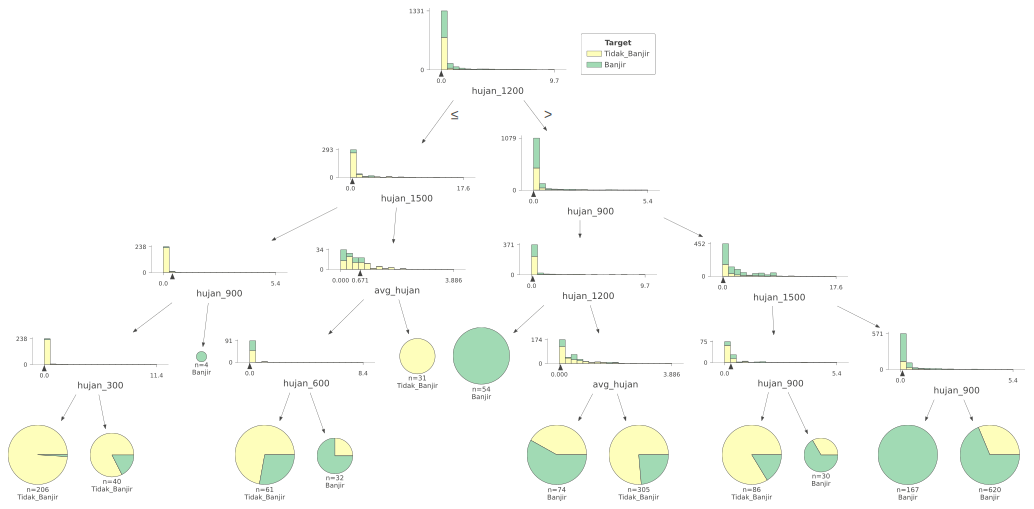

In [ ]:
# Membuat objek Decision Tree Classifier dengan batasan kedalaman maksimum
clf = DecisionTreeClassifier(max_depth=4)

# Melatih Decision Tree Classifier
clf = clf.fit(train_X, train_y)

# Membuat visualisasi pohon keputusan dengan dtreeviz
viz = dtreeviz.model(clf,
               train_X,
               train_y,
               target_name='Target',
               feature_names=train_X.columns,
               class_names=target_names)

# Menampilkan visualisasi dengan Plotly
viz.view()

### Logistic Regression <a class="anchor" id="6.4"></a>

In [ ]:
lr = LogisticRegression(solver='liblinear',penalty='l1')

lr.fit(train_X, train_y)
# get predictions from best model above
y_pred = lr.predict(test_X)

print("Analysis Model Logistic Regression")
print("")
print("Analysis Metric Eror Model Training")

target_names = ['Tidak_Banjir','Banjir']
print(classification_report(test_y, y_pred, target_names=target_names))

print('confusion_matrix : ')
print(confusion_matrix(test_y, y_pred))

print("accuracy_score : ", accuracy_score(test_y, y_pred))
print("f1_score : ", f1_score(test_y, y_pred))

resultsDict['Logistic Regression'] = evaluate_model("Logistic Regression", test_y, y_pred)

Analysis Model Logistic Regression

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

Tidak_Banjir       0.59      0.83      0.69       209
      Banjir       0.73      0.45      0.56       219

    accuracy                           0.64       428
   macro avg       0.66      0.64      0.62       428
weighted avg       0.66      0.64      0.62       428

confusion_matrix : 
[[173  36]
 [120  99]]
accuracy_score :  0.6355140186915887
f1_score :  0.5593220338983051


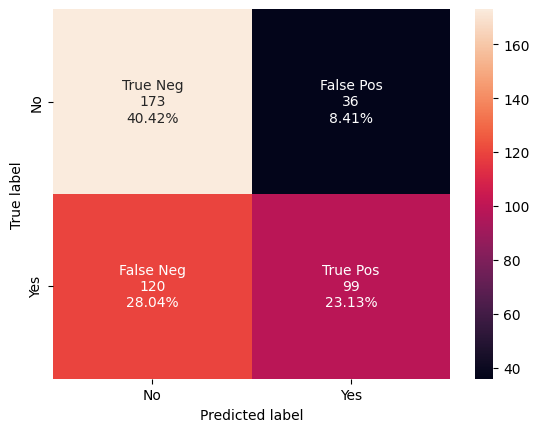

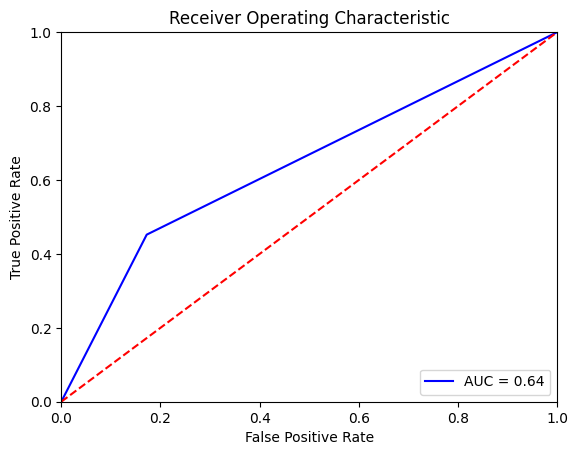

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)

### CatBoost <a class="anchor" id="6.5"></a>

In [ ]:
cat_sm = CatBoostClassifier(iterations=2000, eval_metric = "AUC",verbose=0)
cat_sm.fit(train_X, train_y,verbose=0)

# get predictions from best model above
y_pred = cat_sm.predict(test_X)

print("Analysis Model CatBoost")
print("")
print("Analysis Metric Eror Model Training")

target_names = ['Tidak_Banjir','Banjir']
print(classification_report(test_y, y_pred, target_names=target_names))

print('confusion_matrix : ')
print(confusion_matrix(test_y, y_pred))

print("accuracy_score : ", accuracy_score(test_y, y_pred))
print("f1_score : ", f1_score(test_y, y_pred))

resultsDict['CatBoost'] = evaluate_model("CatBoost", test_y, y_pred)

Analysis Model CatBoost

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

Tidak_Banjir       0.95      0.99      0.97       209
      Banjir       0.99      0.95      0.97       219

    accuracy                           0.97       428
   macro avg       0.97      0.97      0.97       428
weighted avg       0.97      0.97      0.97       428

confusion_matrix : 
[[206   3]
 [ 11 208]]
accuracy_score :  0.9672897196261683
f1_score :  0.9674418604651162


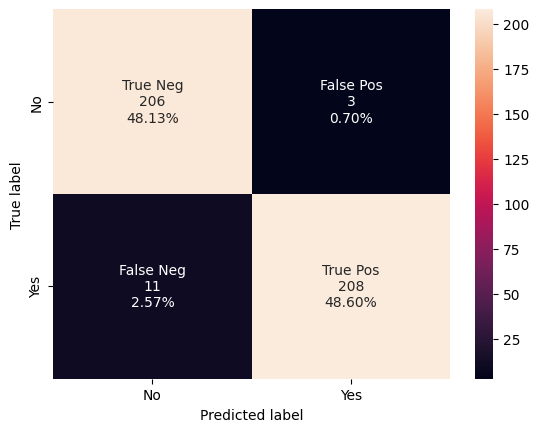

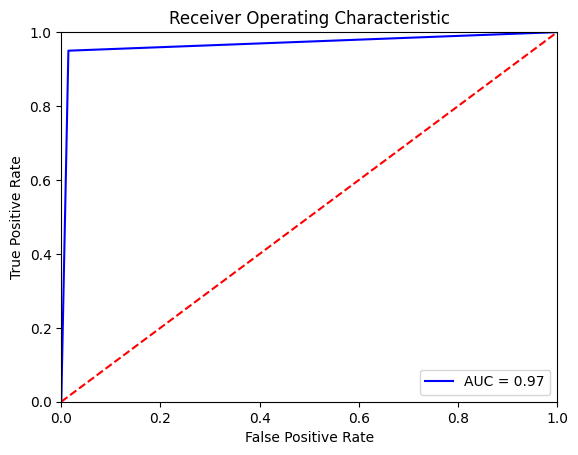

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)

### Neural Network <a class="anchor" id="6.6"></a>

In [ ]:
def NeuralNetwork(num_features=X.shape[1], hidden_layer_sizes=(64, 32)):
    # Adding Input layer
    inputs = Input(shape=(num_features,))
    # Adding dense layer
    x = Dense(hidden_layer_sizes[0], activation='relu')(inputs)
    # Adding dense layer
    x = Dense(hidden_layer_sizes[1], activation='relu')(x)
    # Adding output layer
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    # compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Apply NeuralNetwork
model_nn = NeuralNetwork()

In [ ]:
# checking model summary
model_nn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2850 (11.13 KB)
Trainable params: 2850 (11.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
EPOCHS = 50
BATCH_SIZE = 32
# model fit
history = model_nn.fit(
    train_X,
    train_y,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/50
43/43 [==============================] - 6s 9ms/step - loss: 0.6923 - accuracy: 0.5227 - val_loss: 0.6742 - val_accuracy: 0.6462
Epoch 2/50
43/43 [==============================] - 0s 5ms/step - loss: 0.6612 - accuracy: 0.6418 - val_loss: 0.6393 - val_accuracy: 0.7076
Epoch 3/50
43/43 [==============================] - 0s 5ms/step - loss: 0.6344 - accuracy: 0.6776 - val_loss: 0.6033 - val_accuracy: 0.7573
Epoch 4/50
43/43 [==============================] - 0s 5ms/step - loss: 0.6150 - accuracy: 0.6798 - val_loss: 0.5750 - val_accuracy: 0.7368
Epoch 5/50
43/43 [==============================] - 0s 5ms/step - loss: 0.5941 - accuracy: 0.6864 - val_loss: 0.5576 - val_accuracy: 0.7427
Epoch 6/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5832 - accuracy: 0.7105 - val_loss: 0.5479 - val_accuracy: 0.7515
Epoch 7/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.7171 - val_loss: 0.5422 - val_accuracy: 0.7427
Epoch 8/50
43/43 [==

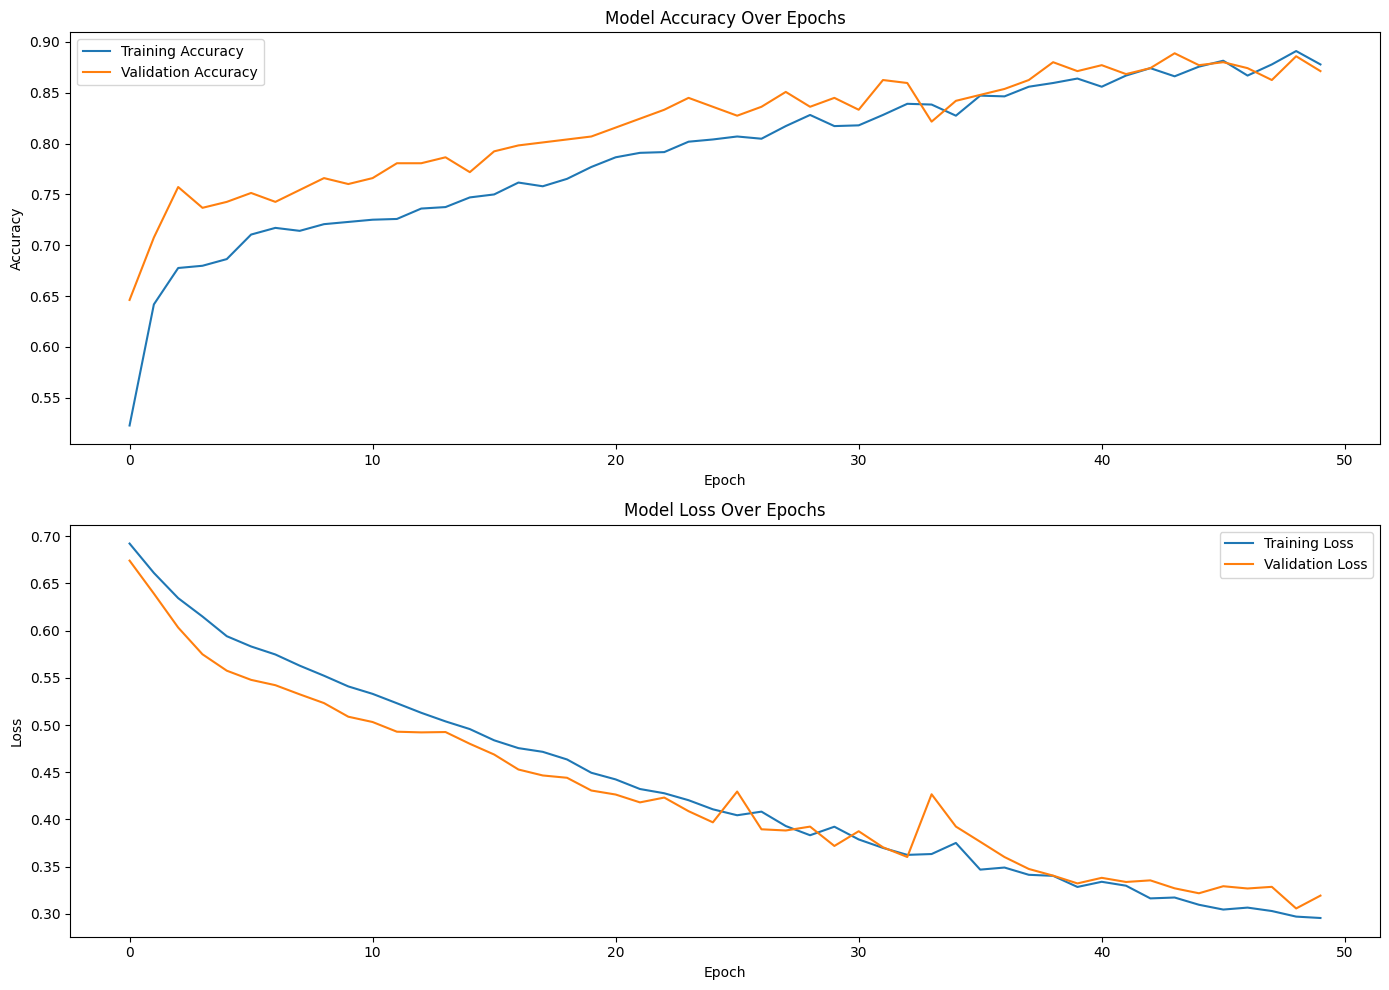

In [ ]:
# Menampilkan plot akurasi dan loss
plt.figure(figsize=(14, 10))

# Plot akurasi
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

# Plot loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# get predictions from best model above
predictions = model_nn.predict(test_X)
y_pred = list(map(lambda x: np.argmax(x), predictions))

print("Analysis Model Neural Network")
print("")
print("Analysis Metric Eror Model Training")

target_names = ['Tidak_Banjir','Banjir']
print(classification_report(test_y, y_pred, target_names=target_names))

print('confusion_matrix : ')
print(confusion_matrix(test_y, y_pred))

print("accuracy_score : ", accuracy_score(test_y, y_pred))
print("f1_score : ", f1_score(test_y, y_pred))

resultsDict['Neural Network'] = evaluate_model("Neural Network", test_y, y_pred)

14/14 [==============================] - 0s 2ms/step
Analysis Model Neural Network

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

Tidak_Banjir       0.82      0.92      0.86       209
      Banjir       0.91      0.80      0.85       219

    accuracy                           0.86       428
   macro avg       0.86      0.86      0.86       428
weighted avg       0.87      0.86      0.86       428

confusion_matrix : 
[[192  17]
 [ 43 176]]
accuracy_score :  0.8598130841121495
f1_score :  0.8543689320388349


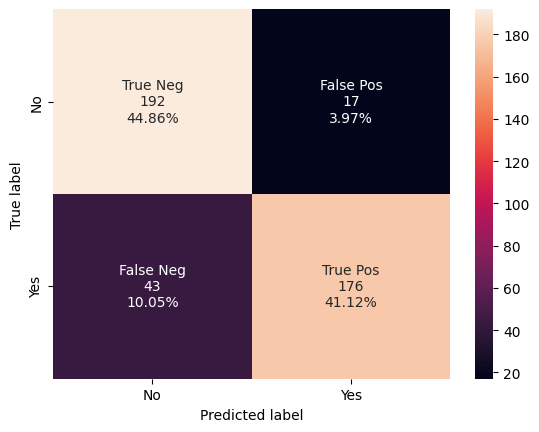

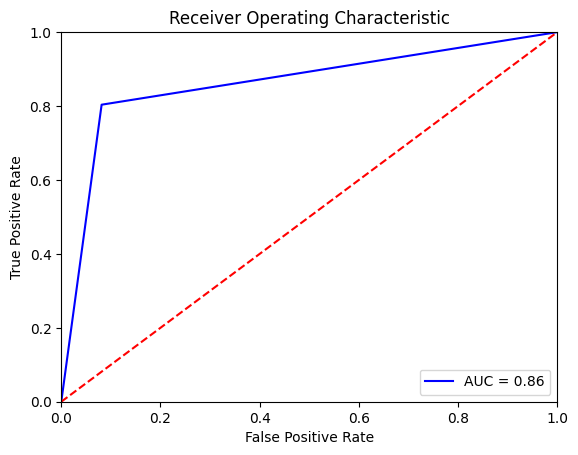

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)

### Hyperparameter Optimization <a class="anchor" id="6.7"></a>

#### Grid Search - Random Forest <a class="anchor" id="6.7.1"></a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
# Instantiate model with 1000 decision trees

rf_best_parameter = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 1,
                                          max_features = 'sqrt', max_depth = None, bootstrap = False,
                                          random_state = 42)
# Train the model on training data
rf_best_parameter.fit(train_X, train_y)

print("Analysis Model Random Forest with Grid Search")
print("")
print("Analysis Metric Eror Model Training")

target_names = ['Tidak_Banjir','Banjir']
print(classification_report(test_y, y_pred, target_names=target_names))

print('confusion_matrix : ')
print(confusion_matrix(test_y, y_pred))

print("accuracy_score : ", accuracy_score(test_y, y_pred))
print("f1_score : ", f1_score(test_y, y_pred))

resultsDict['Random Forest with GS'] = evaluate_model("Random Forest with GS", test_y, y_pred)

Analysis Model Random Forest with Grid Search

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

Tidak_Banjir       0.82      0.92      0.86       209
      Banjir       0.91      0.80      0.85       219

    accuracy                           0.86       428
   macro avg       0.86      0.86      0.86       428
weighted avg       0.87      0.86      0.86       428

confusion_matrix : 
[[192  17]
 [ 43 176]]
accuracy_score :  0.8598130841121495
f1_score :  0.8543689320388349


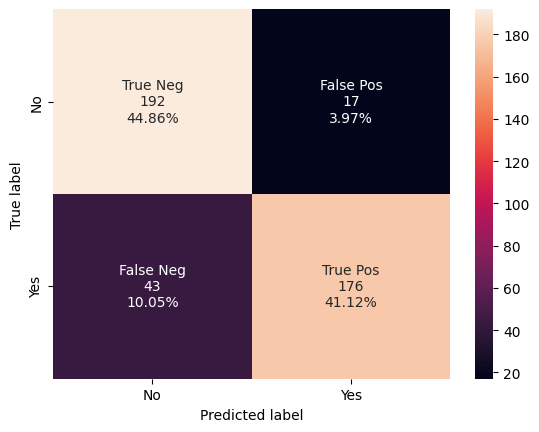

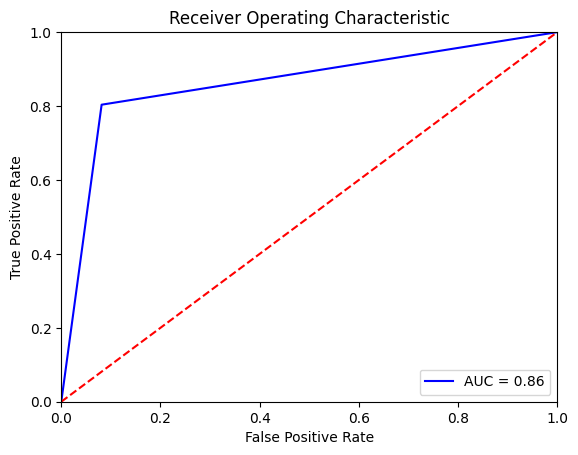

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)

#### Grid search - SVM <a class="anchor" id="6.7.2"></a>

In [ ]:
svm_gs = GridSearchCV(svm.SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
svm_gs.fit(train_X, train_y)
yhat = svm_gs.predict(train_X)

print("Analysis Model SVM with Grid Search")
print("")
print("Analysis Metric Eror Model Training")

target_names = ['Tidak_Banjir','Banjir']
print(classification_report(test_y, y_pred, target_names=target_names))

print('confusion_matrix : ')
print(confusion_matrix(test_y, y_pred))

print("accuracy_score : ", accuracy_score(test_y, y_pred))
print("f1_score : ", f1_score(test_y, y_pred))

resultsDict['SVM with GS'] = evaluate_model("SVM with GS", test_y, y_pred)

Analysis Model SVM with Grid Search

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

Tidak_Banjir       0.82      0.92      0.86       209
      Banjir       0.91      0.80      0.85       219

    accuracy                           0.86       428
   macro avg       0.86      0.86      0.86       428
weighted avg       0.87      0.86      0.86       428

confusion_matrix : 
[[192  17]
 [ 43 176]]
accuracy_score :  0.8598130841121495
f1_score :  0.8543689320388349


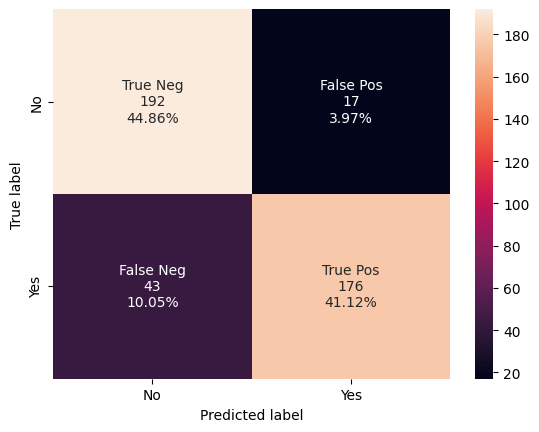

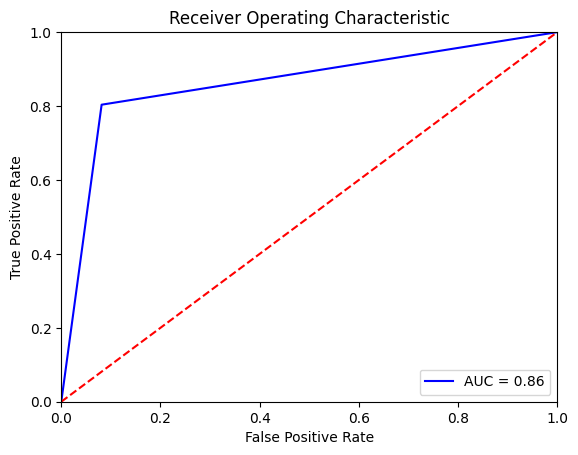

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)

## 7. Evaluasi Model <a class="anchor" id="7"></a>

In [ ]:
# Membuat DataFrame dari dictionary
results_df = pd.concat([pd.DataFrame(v).set_index('Model') for v in resultsDict.values()], axis=0)

# Menampilkan DataFrame hasil evaluasi
results_df

,MAE,RMSE,R2,Precision,Recall,Accuracy,F1 Score,ROC-AUC
Model,,,,,,,,
Naive Bayes,0.457944,0.676716,-0.832776,0.568047,0.438356,0.542056,0.494845,0.544537
XGBoost,0.032710,0.180860,0.869087,0.981221,0.954338,0.967290,0.967593,0.967600
Decision Tree,0.056075,0.236801,0.775578,0.949309,0.940639,0.943925,0.944954,0.944004
Logistic Regression,0.364486,0.603727,-0.458740,0.733333,0.452055,0.635514,0.559322,0.639903
CatBoost,0.032710,0.180860,0.869087,0.985782,0.949772,0.967290,0.967442,0.967709
Neural Network,0.140187,0.374415,0.438946,0.911917,0.803653,0.859813,0.854369,0.861157
Random Forest with GS,0.140187,0.374415,0.438946,0.911917,0.803653,0.859813,0.854369,0.861157
SVM with GS,0.140187,0.374415,0.438946,0.911917,0.803653,0.859813,0.854369,0.861157


In [ ]:
# Define a function to highlight minimum values for MAE and RMSE, and maximum values for other columns
def highlight_min_max(col):
    if col.name in ['MAE', 'RMSE']:
        is_min = col == col.min()
        return ['background-color: #FF6961' if v else '' for v in is_min]
    else:
        is_max = col == col.max()
        return ['background-color: #00F180' if v else '' for v in is_max]

# Apply the function to the entire DataFrame
styled_df = results_df.style.apply(highlight_min_max)

# Display the styled DataFrame
styled_df

,MAE,RMSE,R2,Precision,Recall,Accuracy,F1 Score,ROC-AUC
Model,,,,,,,,
Naive Bayes,0.457944,0.676716,-0.832776,0.568047,0.438356,0.542056,0.494845,0.544537
XGBoost,0.032710,0.180860,0.869087,0.981221,0.954338,0.967290,0.967593,0.967600
Decision Tree,0.056075,0.236801,0.775578,0.949309,0.940639,0.943925,0.944954,0.944004
Logistic Regression,0.364486,0.603727,-0.458740,0.733333,0.452055,0.635514,0.559322,0.639903
CatBoost,0.032710,0.180860,0.869087,0.985782,0.949772,0.967290,0.967442,0.967709
Neural Network,0.140187,0.374415,0.438946,0.911917,0.803653,0.859813,0.854369,0.861157
Random Forest with GS,0.140187,0.374415,0.438946,0.911917,0.803653,0.859813,0.854369,0.861157
SVM with GS,0.140187,0.374415,0.438946,0.911917,0.803653,0.859813,0.854369,0.861157


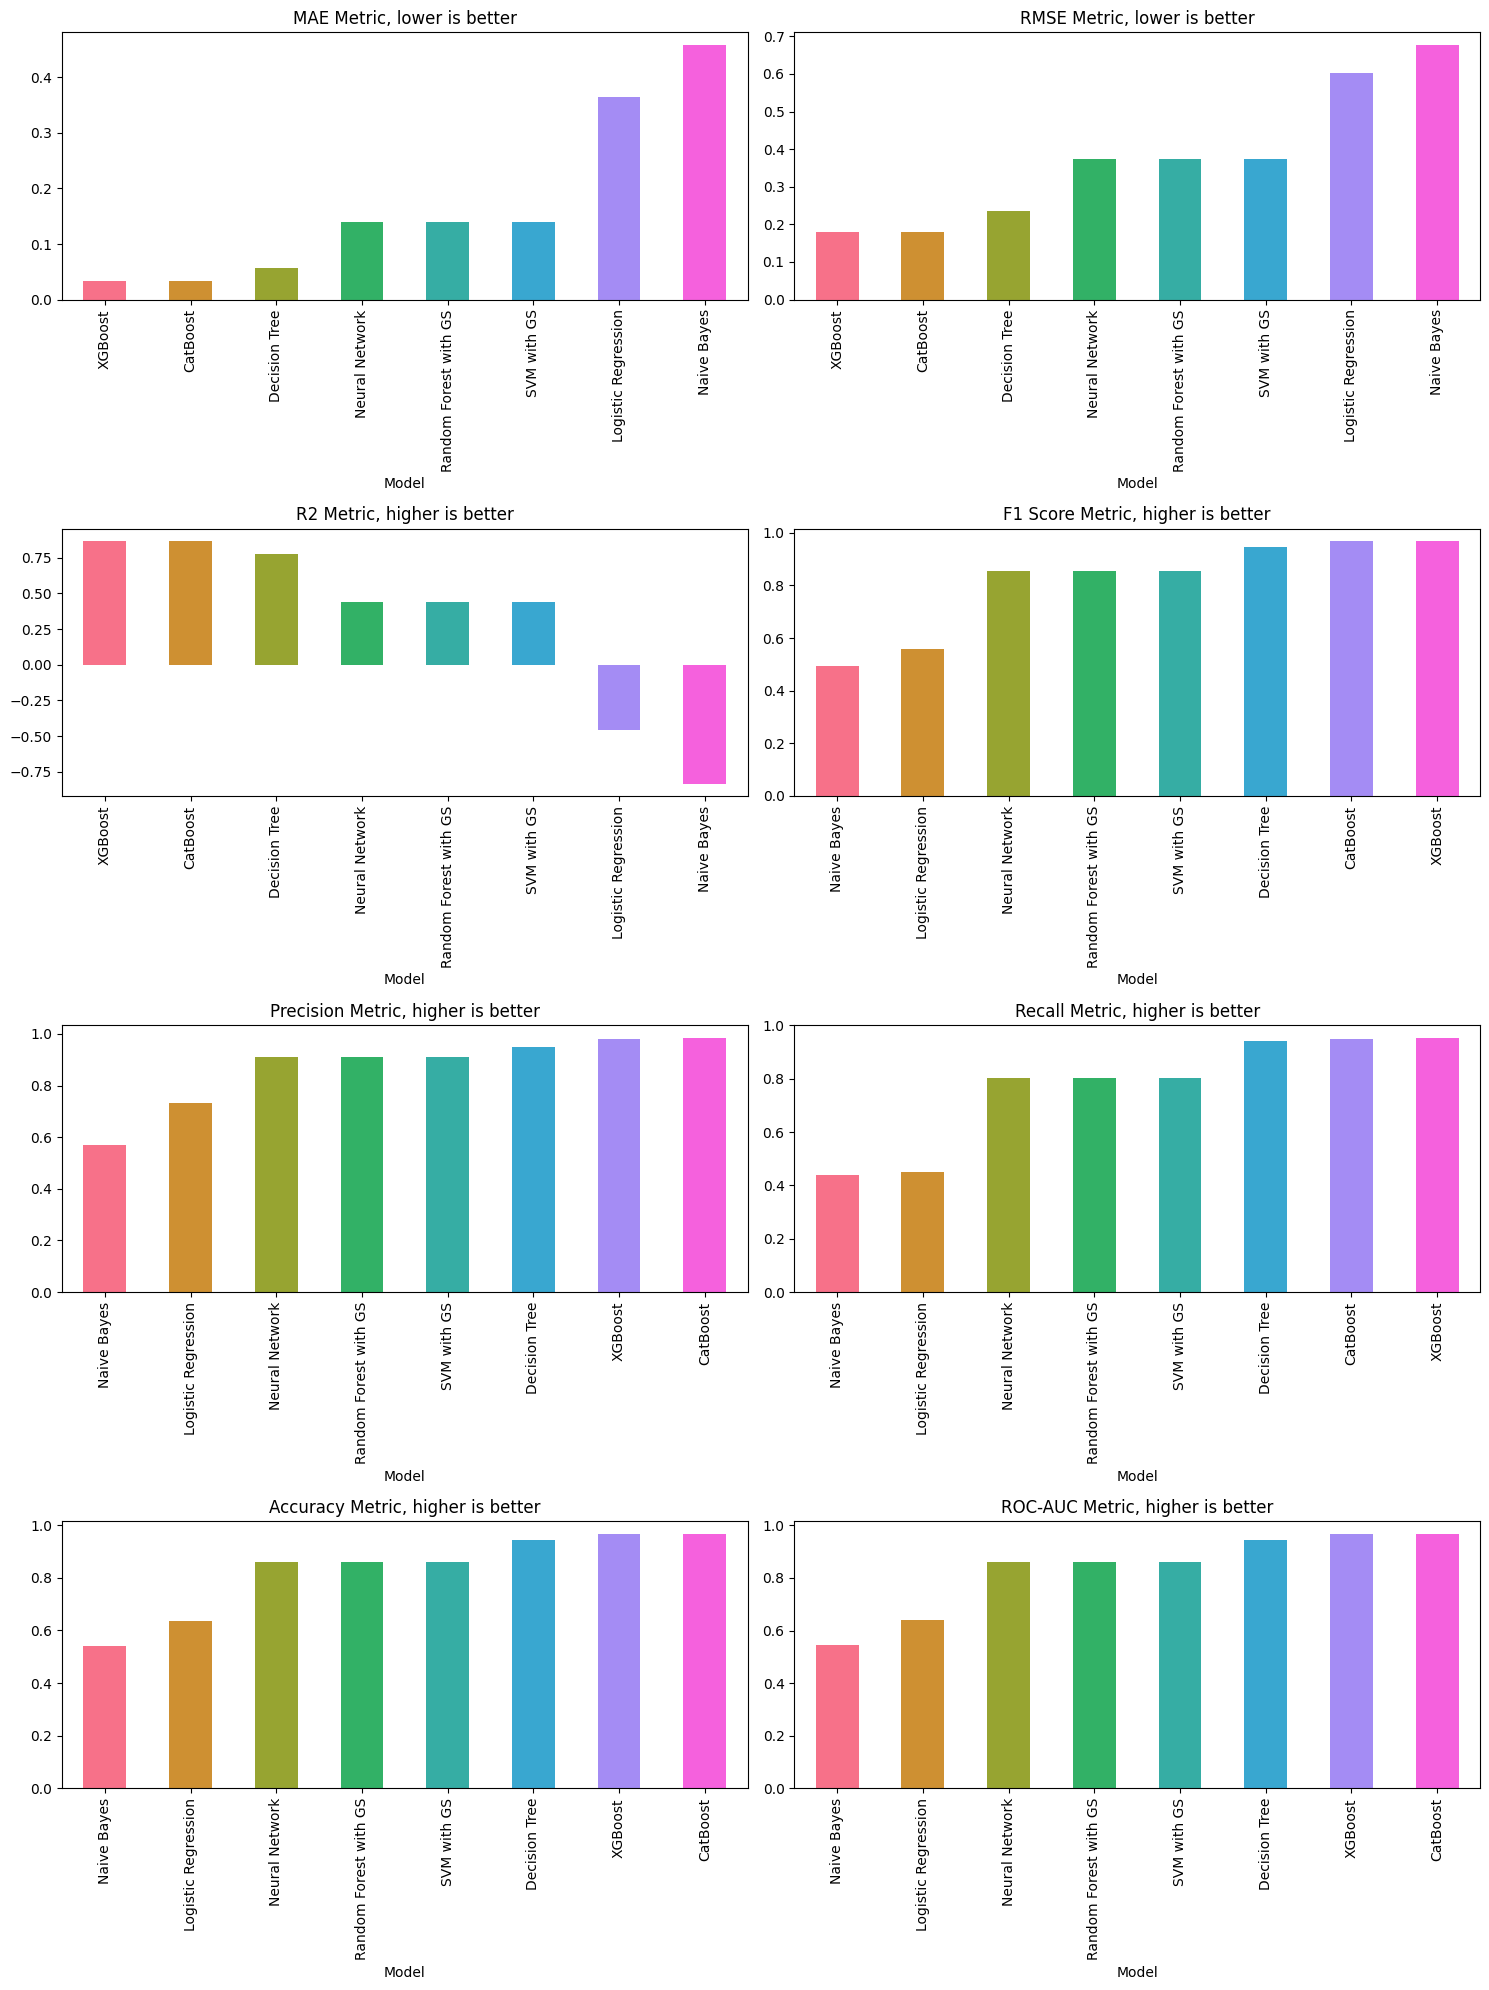

In [ ]:
def bar_metrics(results_df):
    df = results_df.copy()

    # Definisikan palet warna
    palette = sns.color_palette("husl", n_colors=len(df.columns))

    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

    # MAE plot
    df.sort_values(by='MAE').plot(kind="bar", y='MAE', color=palette, ax=axes[0, 0], legend=False)
    axes[0, 0].set_title("MAE Metric, lower is better")

    # RMSE plot
    df.sort_values(by='RMSE').plot(kind="bar", y='RMSE', color=palette, ax=axes[0, 1], legend=False)
    axes[0, 1].set_title("RMSE Metric, lower is better")

    # R2 plot
    df.sort_values(by='R2', ascending=False).plot(kind="bar", y='R2', color=palette, ax=axes[1, 0], legend=False)
    axes[1, 0].set_title("R2 Metric, higher is better")

    # F1 Score plot
    df.sort_values(by='F1 Score').plot(kind="bar", y='F1 Score', color=palette, ax=axes[1, 1], legend=False)
    axes[1, 1].set_title("F1 Score Metric, higher is better")

    # Precision plot
    df.sort_values(by='Precision').plot(kind="bar", y='Precision', color=palette, ax=axes[2, 0], legend=False)
    axes[2, 0].set_title("Precision Metric, higher is better")

    # Recall plot
    df.sort_values(by='Recall').plot(kind="bar", y='Recall', color=palette, ax=axes[2, 1], legend=False)
    axes[2, 1].set_title("Recall Metric, higher is better")

    # Accuracy plot
    df.sort_values(by='Accuracy').plot(kind="bar", y='Accuracy', color=palette, ax=axes[3, 0], legend=False)
    axes[3, 0].set_title("Accuracy Metric, higher is better")

    # ROC-AUC plot
    df.sort_values(by='ROC-AUC').plot(kind="bar", y='ROC-AUC', color=palette, ax=axes[3, 1], legend=False)
    axes[3, 1].set_title("ROC-AUC Metric, higher is better")

    plt.tight_layout()
    plt.show()

# Panggil fungsi bar_metrics dengan DataFrame hasil evaluasi model Anda
bar_metrics(results_df)


Model **CatBoost** memperoleh nilai F1 Score tertinggi di antara model lainnya, yaitu sebesar *0.97*. Nilai F1 Score yang tinggi menunjukkan bahwa model ini memiliki keseimbangan yang baik antara presisi (precision) dan recall, yang sangat penting dalam kasus klasifikasi di mana perbandingan antara kelas positif dan negatif tidak seimbang. Model CatBoost ini memiliki kemampuan untuk mengidentifikasi dengan akurat sejumlah besar kasus positif (banjir) tanpa mengorbankan tingkat kesalahan positif yang tinggi. Oleh karena itu, model ini dapat dianggap sebagai model yang efektif dalam memprediksi kejadian banjir di Kabupaten Cilacap.

In [ ]:
# Simpan model terbaik

model = cat_sm  # Model Catboost
# model = xgb  # Model XGBoost

filename= 'model_prediksi_banjir.sav'
pickle.dump(model, open(filename,'wb'))

## 8. Feature Importance <a class="anchor" id="8"></a>

In [ ]:
# Plot feature importance
feature_importance = cat_sm.get_feature_importance(type="FeatureImportance")
feature_names = train_X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame(list(zip(feature_names, feature_importance)), columns=['Feature', 'Importance'])

# Mengurutkan DataFrame berdasarkan Importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Membuat bar plot menggunakan Plotly dengan warna acak
fig = go.Figure(go.Bar(
    x=feature_importance_df['Importance'],
    y=feature_importance_df['Feature'],
    orientation='h',
    marker=dict(color=feature_importance_df['Importance'], colorscale='viridis', cmin=0, cmax=max(feature_importance_df['Importance']), colorbar=dict(title='Importance')),
))

fig.update_layout(
    title='CatBoost Feature Importance',
    xaxis=dict(title='Importance'),
    yaxis=dict(title='Feature'),
    height=600,
    width=1000,
)

fig.show()

Plot feature importance menunjukkan bahwa fitur hujan pada jam 12 siang (hujan_1200) menduduki posisi teratas dalam kontribusinya terhadap prediksi model CatBoost. Nilai importance yang tinggi untuk hujan_1200 menandakan bahwa variasi dalam curah hujan pada jam tersebut memiliki pengaruh yang paling signifikan dalam membentuk prediksi model. Hal ini menunjukkan bahwa informasi terkait dengan curah hujan pada tengah hari menjadi faktor yang paling penting dalam memprediksi kemungkinan kejadian banjir di Kabupaten Cilacap.

## 9. Prediksi <a class="anchor" id="9"></a>

In [ ]:
# Misalkan 'new_data' adalah DataFrame baru yang memiliki fitur yang sama dengan data latih
# Di sini hanya memberikan contoh fitur dan nilai untuk keperluan demonstrasi
new_data = pd.DataFrame({
    'hujan_0': [1.5],
    'hujan_300': [0.8],
    'hujan_600': [0.2],
    'hujan_900': [1.0],
    'hujan_1200': [0.5],
    'hujan_1500': [0.1],
    'hujan_2100': [1.2],
    'min_hujan': [0.0],
    'max_hujan': [2.0],
    'avg_hujan': [0.8]
})

# Load the trained CatBoost model from the saved file
filename = '/content/model_prediksi_banjir.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Make predictions on the new data
predictions = loaded_model.predict(new_data)

# Label hasil prediksi
hasil_prediksi = ['Banjir' if pred == 1 else 'Tidak Banjir' for pred in predictions]

# Menambahkan hasil prediksi ke DataFrame 'new_data'
new_data['Hasil Prediksi'] = hasil_prediksi

# Display the new_data with prediction results
new_data[['Hasil Prediksi']]

,Hasil Prediksi
0,Banjir
